In [5]:
import project_functions1 as p1
import seaborn as sns
df = p1.load_and_process("../data/processed/Data.csv")
df
import project_functions1 as p1

In [6]:
df1 = (df.drop(df.columns[[1,2,3,4,10,15,16,17,18,19,20,21,22,23,24]], axis=1)
         .rename(columns={
         "Selected Government of Canada benchmark bond yields: 2 year": "S2Y",   
         "Selected Government of Canada benchmark bond yields: 3 year": "S3Y",
         "Selected Government of Canada benchmark bond yields: 5 year": "S5Y",
         "Selected Government of Canada benchmark bond yields: 7 year": "S7Y",
         "Selected Government of Canada benchmark bond yields: 10 year": "S10Y",
         "Government of Canada marketable bonds, average yield: 1-3 year 6": "M2Y",
         "Government of Canada marketable bonds, average yield: 3-5 year 6": "M4Y",
         "Government of Canada marketable bonds, average yield: 5-10 year 6": "M7Y",
         "Government of Canada marketable bonds, average yield: over 10 years 6": "M10Y",
         "Treasury Bills: 1 month": "T1M",
         "Treasury Bills: 2 month": "T2M",
         "Treasury Bills: 3 month": "T3M",
         "Treasury Bills: 6 month": "T6M",
         "Treasury Bills: 1 year": "T1Y",
         "Real return bonds, long-term": "Real Return"
                         }
                ))
df1

,Date,S2Y,S3Y,S5Y,S7Y,S10Y,M2Y,M4Y,M7Y,M10Y,T1M,T2M,T3M,T6M,T1Y,Real Return
0,3-Jan-18,1.68,1.72,1.86,1.95,2.05,1.66,1.81,1.98,2.24,0.95,1.01,1.06,1.21,1.52,0.58
1,10-Jan-18,1.73,1.79,1.95,2.04,2.16,1.71,1.88,2.07,2.33,0.94,1.04,1.17,1.38,1.62,0.63
2,17-Jan-18,1.78,1.83,2.0,2.1,2.2,1.73,1.94,2.12,2.31,1.0,1.13,1.18,1.35,1.6,0.59
3,24-Jan-18,1.81,1.87,2.05,2.15,2.26,1.77,1.98,2.18,2.35,1.11,1.13,1.21,1.36,1.62,0.6
4,31-Jan-18,1.84,1.96,2.08,2.19,2.29,1.79,2.01,2.21,2.35,1.12,1.15,1.2,1.34,1.61,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,25-Aug-21,0.45,0.57,0.87,1.04,1.25,0.42,0.78,1.15,1.73,0.19,0.21,0.18,0.17,0.27,0.15
191,1-Sep-21,0.41,0.51,0.79,0.96,1.18,0.37,0.71,1.08,1.65,0.19,0.15,0.12,0.18,0.25,0.06
192,8-Sep-21,0.39,0.49,0.8,0.98,1.2,0.38,0.74,1.13,1.69,0.19,0.14,0.15,0.17,0.27,0.04
193,15-Sep-21,0.42,0.52,0.83,1.0,1.22,0.41,0.77,1.15,1.69,0.19,0.13,0.15,0.18,0.28,0.03


In [7]:
df2 = (df1.assign(One_Month = df1["T1M"])
          .assign(Two_Month = df1["T2M"])
          .assign(Three_Month = df1["T3M"])
          .assign(Six_Month = df1["T6M"])
          .assign(One_Year = df1["T1Y"])
          .assign(Two_Year = (df1["S2Y"]+df1["M2Y"])/2)
          .assign(Three_Year = df1["S3Y"])
          .assign(Four_Year = df1["M4Y"])
          .assign(Five_Year = df1["S5Y"])
          .assign(Seven_Year = (df1["S7Y"]+df1["M7Y"])/2)
          .assign(Ten_Year = (df1["S10Y"]+df1["M10Y"])/2)
          .drop(df1.columns[[1,2,3,4,5,6,7,8,9,10,11,12,13,14]], axis=1)
      )
df2

,Date,Real Return,One_Month,Two_Month,Three_Month,Six_Month,One_Year,Two_Year,Three_Year,Four_Year,Five_Year,Seven_Year,Ten_Year
0,3-Jan-18,0.58,0.95,1.01,1.06,1.21,1.52,1.67,1.72,1.81,1.86,1.965,2.145
1,10-Jan-18,0.63,0.94,1.04,1.17,1.38,1.62,1.72,1.79,1.88,1.95,2.055,2.245
2,17-Jan-18,0.59,1.0,1.13,1.18,1.35,1.6,1.755,1.83,1.94,2.0,2.11,2.255
3,24-Jan-18,0.6,1.11,1.13,1.21,1.36,1.62,1.79,1.87,1.98,2.05,2.165,2.305
4,31-Jan-18,0.6,1.12,1.15,1.2,1.34,1.61,1.815,1.96,2.01,2.08,2.2,2.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,25-Aug-21,0.15,0.19,0.21,0.18,0.17,0.27,0.435,0.57,0.78,0.87,1.095,1.49
191,1-Sep-21,0.06,0.19,0.15,0.12,0.18,0.25,0.39,0.51,0.71,0.79,1.02,1.415
192,8-Sep-21,0.04,0.19,0.14,0.15,0.17,0.27,0.385,0.49,0.74,0.8,1.055,1.445
193,15-Sep-21,0.03,0.19,0.13,0.15,0.18,0.28,0.415,0.52,0.77,0.83,1.075,1.455


In [8]:
Return_Level = []
for i in df2["Real Return"]:
    if i < 0:
        Return_Level.append("Negative")
    elif 0< i < 0.3:
        Return_Level.append("Low")
    elif 0.3<i<0.6:
        Return_Level.append("Medium")
    else:
        Return_Level.append("High")
df2["Return Level"]=Return_Level
df2

,Date,Real Return,One_Month,Two_Month,Three_Month,Six_Month,One_Year,Two_Year,Three_Year,Four_Year,Five_Year,Seven_Year,Ten_Year,Return Level
0,3-Jan-18,0.58,0.95,1.01,1.06,1.21,1.52,1.67,1.72,1.81,1.86,1.965,2.145,Medium
1,10-Jan-18,0.63,0.94,1.04,1.17,1.38,1.62,1.72,1.79,1.88,1.95,2.055,2.245,High
2,17-Jan-18,0.59,1.0,1.13,1.18,1.35,1.6,1.755,1.83,1.94,2.0,2.11,2.255,Medium
3,24-Jan-18,0.6,1.11,1.13,1.21,1.36,1.62,1.79,1.87,1.98,2.05,2.165,2.305,High
4,31-Jan-18,0.6,1.12,1.15,1.2,1.34,1.61,1.815,1.96,2.01,2.08,2.2,2.32,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,25-Aug-21,0.15,0.19,0.21,0.18,0.17,0.27,0.435,0.57,0.78,0.87,1.095,1.49,Low
191,1-Sep-21,0.06,0.19,0.15,0.12,0.18,0.25,0.39,0.51,0.71,0.79,1.02,1.415,Low
192,8-Sep-21,0.04,0.19,0.14,0.15,0.17,0.27,0.385,0.49,0.74,0.8,1.055,1.445,Low
193,15-Sep-21,0.03,0.19,0.13,0.15,0.18,0.28,0.415,0.52,0.77,0.83,1.075,1.455,Low


In [9]:
df3 = (df2.assign(Short_Period = (df2["One_Month"]+df2["Two_Month"]+df2["Three_Month"]+df2["Six_Month"])/4)
          .assign(Medium_Period = (df2["One_Year"]+df2["Two_Year"]+df2["Three_Year"]+df2["Four_Year"])/4)
          .assign(Long_Period = (df2["Seven_Year"]+df2["Five_Year"]+df2["Ten_Year"])/3)
          .drop(df2.columns[[0,1,2,3,4,5,6,7,8,9,10,11,12]], axis=1)
      )
df3

,Return Level,Short_Period,Medium_Period,Long_Period
0,Medium,1.0575,1.68,1.99
1,High,1.1325,1.7525,2.083333
2,Medium,1.165,1.78125,2.121667
3,High,1.2025,1.815,2.173333
4,High,1.2025,1.84875,2.2
...,...,...,...,...
190,Low,0.1875,0.51375,1.151667
191,Low,0.16,0.465,1.075
192,Low,0.1625,0.47125,1.1
193,Low,0.1625,0.49625,1.12


<AxesSubplot:>

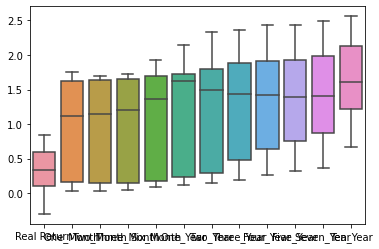

In [13]:
New = p1.new_dataframe(df1)
sns.boxplot(data=New)